In [1]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

target_url = "https://marketcheck-prod.apigee.net/v1/popular/cars?api_key=3XhPmWArI3SYYbfFZpGuUFLEtVgEZvEn&state=GA&car_type=new"



In [2]:
car_response = requests.get(f"{target_url}").json()

In [3]:
type(car_response)

list

In [4]:
print(car_response[0])

{'inventory_type': 'new', 'count': 1134, 'make': 'Ford', 'model': 'F-150', 'price_stats': {'geometric_mean': 42347, 'listings_count': 1046, 'min': 22184, 'median': 41563, 'population_standard_deviation': 10953, 'variance': 119966034, 'max': 109515, 'mean': 43600, 'trimmed_mean': 42495, 'standard_deviation': 10953, 'iqr': 13025}, 'miles_stats': {'geometric_mean': 17, 'listings_count': 142, 'min': 1, 'median': 10, 'population_standard_deviation': 1145, 'variance': 1311461, 'max': 7506, 'mean': 457, 'trimmed_mean': 162, 'standard_deviation': 1145, 'iqr': 28}, 'dom_stats': {'geometric_mean': 51, 'listings_count': 1134, 'min': 1, 'median': 64, 'population_standard_deviation': 97, 'variance': 9368, 'max': 703, 'mean': 96, 'trimmed_mean': 81, 'standard_deviation': 97, 'iqr': 116}}


In [5]:
print(json.dumps(car_response[0],indent=3))

{
   "inventory_type": "new",
   "count": 1134,
   "make": "Ford",
   "model": "F-150",
   "price_stats": {
      "geometric_mean": 42347,
      "listings_count": 1046,
      "min": 22184,
      "median": 41563,
      "population_standard_deviation": 10953,
      "variance": 119966034,
      "max": 109515,
      "mean": 43600,
      "trimmed_mean": 42495,
      "standard_deviation": 10953,
      "iqr": 13025
   },
   "miles_stats": {
      "geometric_mean": 17,
      "listings_count": 142,
      "min": 1,
      "median": 10,
      "population_standard_deviation": 1145,
      "variance": 1311461,
      "max": 7506,
      "mean": 457,
      "trimmed_mean": 162,
      "standard_deviation": 1145,
      "iqr": 28
   },
   "dom_stats": {
      "geometric_mean": 51,
      "listings_count": 1134,
      "min": 1,
      "median": 64,
      "population_standard_deviation": 97,
      "variance": 9368,
      "max": 703,
      "mean": 96,
      "trimmed_mean": 81,
      "standard_deviation": 97,
   

In [6]:
#List of Car Make, model, MakeModel
car_make=[]
car_Model=[]
car_makeModel = []

#List of Car Make Counts
car_Sales = []

In [7]:
#car_makeModel.append(car["make"]+"-"+car["model"])
for car in car_response:
    car_make.append(car["make"])
    car_Model.append(car["model"])
    car_Sales.append(car["count"])
    
print(car_make)
print(car_Model)
#print(car_makeModel)

print(car_Sales)


#type(car_makeModel)
#type(car_Sales)


['Ford', 'Chevrolet', 'Toyota', 'Ram', 'Toyota', 'Toyota', 'GMC', 'Toyota', 'Toyota', 'Ford', 'Chevrolet', 'Honda', 'Chevrolet', 'Chevrolet', 'Jeep', 'Jeep', 'Nissan', 'Jeep', 'Honda', 'Nissan', 'Jeep', 'Chevrolet', 'Chevrolet', 'Lexus', 'Kia', 'Ford', 'Buick', 'Ford', 'Ram', 'Kia', 'Dodge', 'Ford', 'Chevrolet', 'Volkswagen', 'Kia', 'Honda', 'Hyundai', 'GMC', 'Volkswagen', 'Chevrolet', 'GMC', 'Toyota', 'Honda', 'Nissan', 'Kia', 'Toyota', 'Ford', 'Kia', 'Jeep', 'Dodge']
['F-150', 'Silverado', 'Camry', '1500', 'Corolla', 'RAV4', 'Sierra', 'Tacoma', 'Highlander', 'Explorer', 'Silverado 1500', 'CR-V', 'Colorado', 'Equinox', 'Cherokee', 'Renegade', 'Altima', 'Wrangler', 'Accord', 'Rogue', 'Grand Cherokee', 'Blazer', 'Traverse', 'RX', 'Sorento', 'Superduty', 'Encore', 'Ranger', '2500', 'Soul', 'Journey', 'Escape', 'Tahoe', 'Jetta', 'Forte', 'Civic', 'Elantra', 'Acadia', 'Atlas', 'Malibu', 'Sierra 1500', '4-Runner', 'Pilot', 'Versa', 'Sportage', 'Tundra', 'Edge', 'Optima', 'Compass', 'Challen

In [8]:
carSales_df = pd.DataFrame({
                            #"MakeModel": car_makeModel,
                            "Make":car_make,
                            "Model":car_Model,
                            "Sales": car_Sales})

In [9]:
topCarSalesbyModel_df = carSales_df.head(5)

In [10]:
topCarSalesbyModel_df.head()

,Make,Model,Sales
0,Ford,F-150,1134
1,Chevrolet,Silverado,799
2,Toyota,Camry,652
3,Ram,1500,601
4,Toyota,Corolla,532


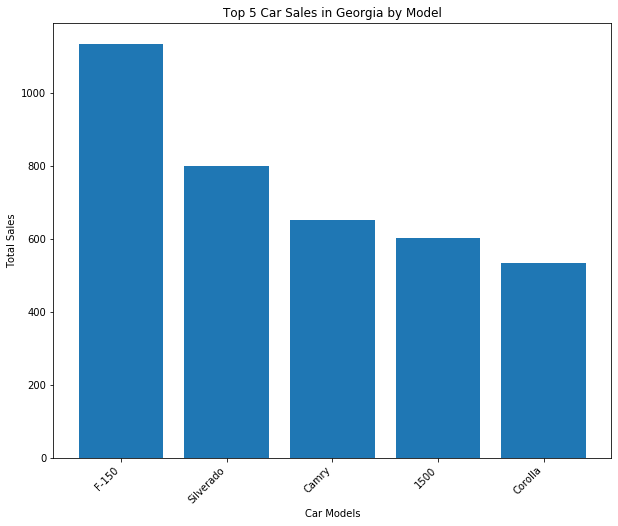

In [11]:
plt.figure(figsize=(10,8))

# create a list of numbers for x values
tick_locations = np.arange(len(topCarSalesbyModel_df))

# create bar chart and set the values of xticks
plt.bar(tick_locations, topCarSalesbyModel_df['Sales'], align="center")
plt.xticks(tick_locations, topCarSalesbyModel_df['Model'], rotation=45, ha="right")

plt.title("Top 5 Car Sales in Georgia by Model")
plt.ylabel("Total Sales")
plt.xlabel("Car Models")

plt.savefig("Top5CarSalesByModel.png")
plt.show()

In [12]:
#byMake_df = carSales_df[["Make","Sales"]]

In [13]:
# CarSalesbyMake_Slice = carSales_df.groupby(['Make']).agg(
#     {
#         'Sales': "sum"
#     }
# )
CarSalesbyMake_df = pd.DataFrame({
                            #"MakeModel": car_makeModel,
                            "Make":car_make,
                            "Sales": car_Sales
                            })

In [14]:
CarSalesbyMake_df.info()

#CarSalesbyMake_Slice["Make"] = byMake_df["Make"]

#CarSalesbyMake_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
Make     50 non-null object
Sales    50 non-null int64
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


In [15]:
#Converted to a Series
GeorgiaMakeSales = CarSalesbyMake_df.groupby(['Make']).sum()["Sales"]

# .agg(
#     {
#         'Sales': "sum"
#     }
# )

In [16]:
type(GeorgiaMakeSales)

pandas.core.series.Series

In [26]:
Georgia_df = pd.DataFrame({"Sales": GeorgiaMakeSales})
#(data=GeorgiaMakeSales.index, columns=['Make'], ['Sales'])

#df = pd.merge(df1, df2, left_index=True, right_index=True)

In [23]:
Georgia_df.head()

,Sales
Make,
Buick,204
Chevrolet,2460
Dodge,328
Ford,2195
GMC,790


In [24]:
SortedGeorgia_df = Georgia_df.sort_values(by=['Sales'], ascending=False)

In [25]:
top5CarSalesbyMake_df = SortedGeorgia_df.head(5)

KeyError: 'Make'

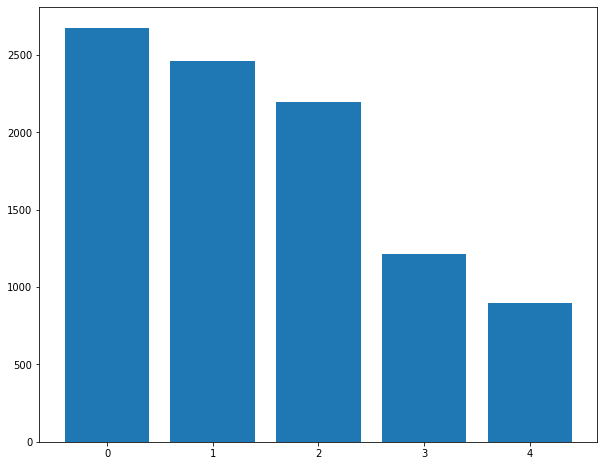

In [21]:
plt.figure(figsize=(10,8))

# create a list of numbers for x values
tick_locations = np.arange(len(top5CarSalesbyMake_df))

# create bar chart and set the values of xticks
plt.bar(tick_locations, top5CarSalesbyMake_df['Sales'], align="center")
plt.xticks(tick_locations, top5CarSalesbyMake_df['Make'], rotation=45, ha="right")

plt.title("Top 5 Car Sales in Georgia by Make")
plt.ylabel("Total Sales")
plt.xlabel("Manufacturer")

plt.savefig("Top5CarSalesByMake.png")
plt.show()